In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# pandas is python library which is used to data reading or visualization.
import pandas as PD 
# matplotlib helps to data visualization.
import matplotlib.pyplot as PLT 

In [4]:
# using pandas library we read all data.
london_data = PD.read_csv('/content/drive/MyDrive/FULLCODE/Dataset/housing_in_london_monthly_variables.csv') 
london_data.head()# print starting 5 rows of data.

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [5]:
london_data.shape  # check shape of data.

(13549, 7)

In [6]:
london_data.info()# check information of dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [7]:
london_data.nunique()  # check unique values in dataset.

date               301
area                45
average_price    13343
code                45
houses_sold       3946
no_of_crimes      2669
borough_flag         2
dtype: int64

In [8]:
london_data.isnull().sum() # checking null values in dataset.

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [9]:
# we use fillna method to fill null values in some column.
london_data['houses_sold'] = london_data['houses_sold'].fillna(london_data['houses_sold'].mean())
london_data['no_of_crimes'] = london_data['no_of_crimes'].fillna(london_data['no_of_crimes'].mean())  

# Line plot graph 

In [10]:
# we set index as date and taking two 2 data variable in table.
london_dataset=london_data.pivot_table(index=['date'], values=['average_price','houses_sold'])   
london_dataset.head()  

,average_price,houses_sold
date,,
1995-01-01,75157.733333,2450.888889
1995-02-01,74804.555556,2433.466667
1995-03-01,74702.888889,3407.288889
1995-04-01,74851.066667,2887.911111
1995-05-01,75564.911111,3266.000000


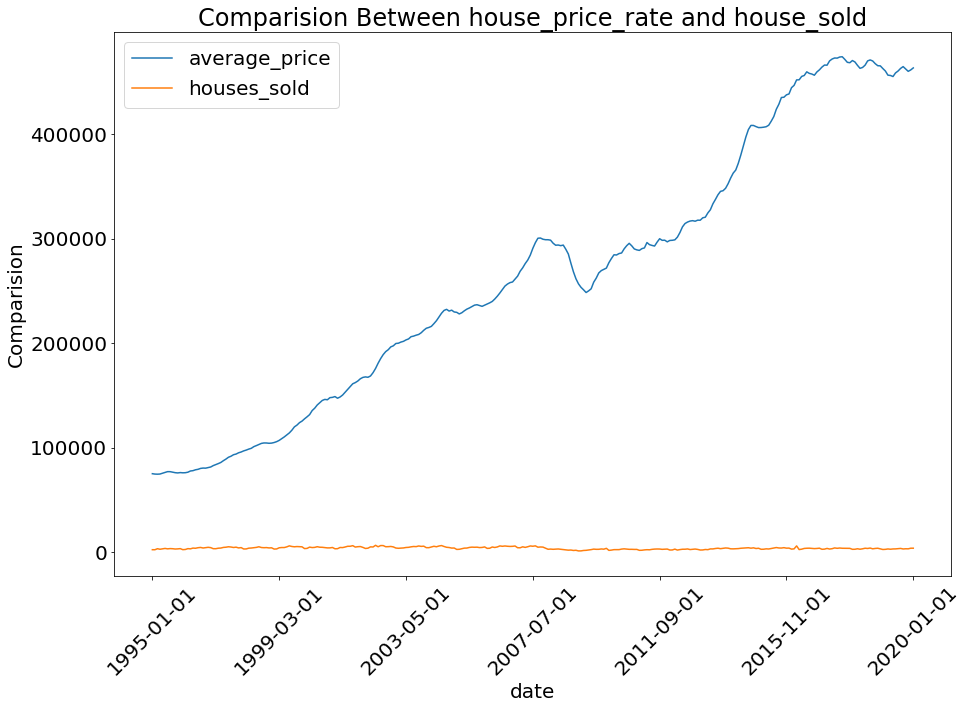

In [11]:
# we give font_size for graph.
PLT.rcParams.update({'font.size': 20})  
# making graph with data and define figure size.
london_dataset.plot(kind='line', figsize=(15,10)) 
# we set ylabel for graph.
PLT.ylabel('Comparision') 
# we set title for graph. 
PLT.title('Comparision Between house_price_rate and house_sold') 
PLT.xticks(rotation=45); 

# Pie chart Visualization

area
westminster    7461.0
lambeth        4701.0
camden         4558.0
southwark      3821.0
newham         3668.0
Name: no_of_crimes, dtype: float64

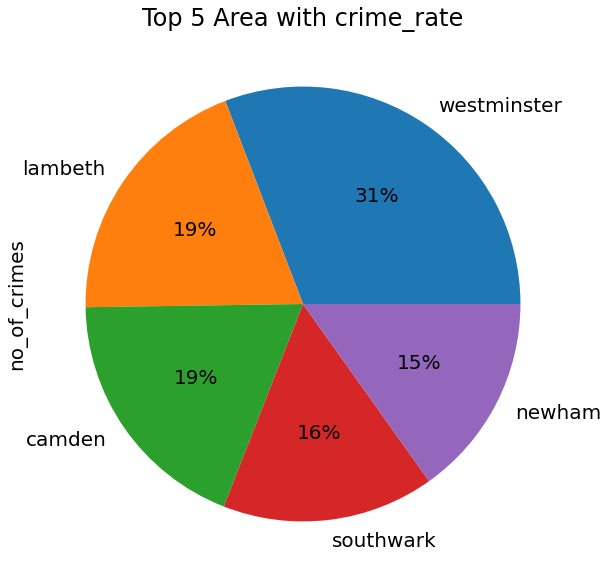

In [12]:
# we picked up top 5 country with crime rate using groupby.
Top_5_Countries = london_data.groupby('area')['no_of_crimes'].max().sort_values(ascending = False).head(5)  
# passing all parameter for graph visualiation.            
Top_5_Countries.plot(kind = "pie",figsize = (20 , 10),fontsize=20,  title="Top 5 Area with crime_rate",autopct='%1.0f%%'); 
Top_5_Countries

# Bar graph visualization

area
city of london             2.0
barking and dagenham      48.0
brent                     58.0
hammersmith and fulham    63.0
kingston upon thames      68.0
newham                    68.0
greenwich                 72.0
haringey                  74.0
kensington and chelsea    78.0
hackney                   79.0
lewisham                  80.0
bexley                    82.0
havering                  85.0
harrow                    87.0
hounslow                  88.0
enfield                   88.0
camden                    89.0
southwark                 89.0
islington                 90.0
lambeth                   92.0
Name: houses_sold, dtype: float64

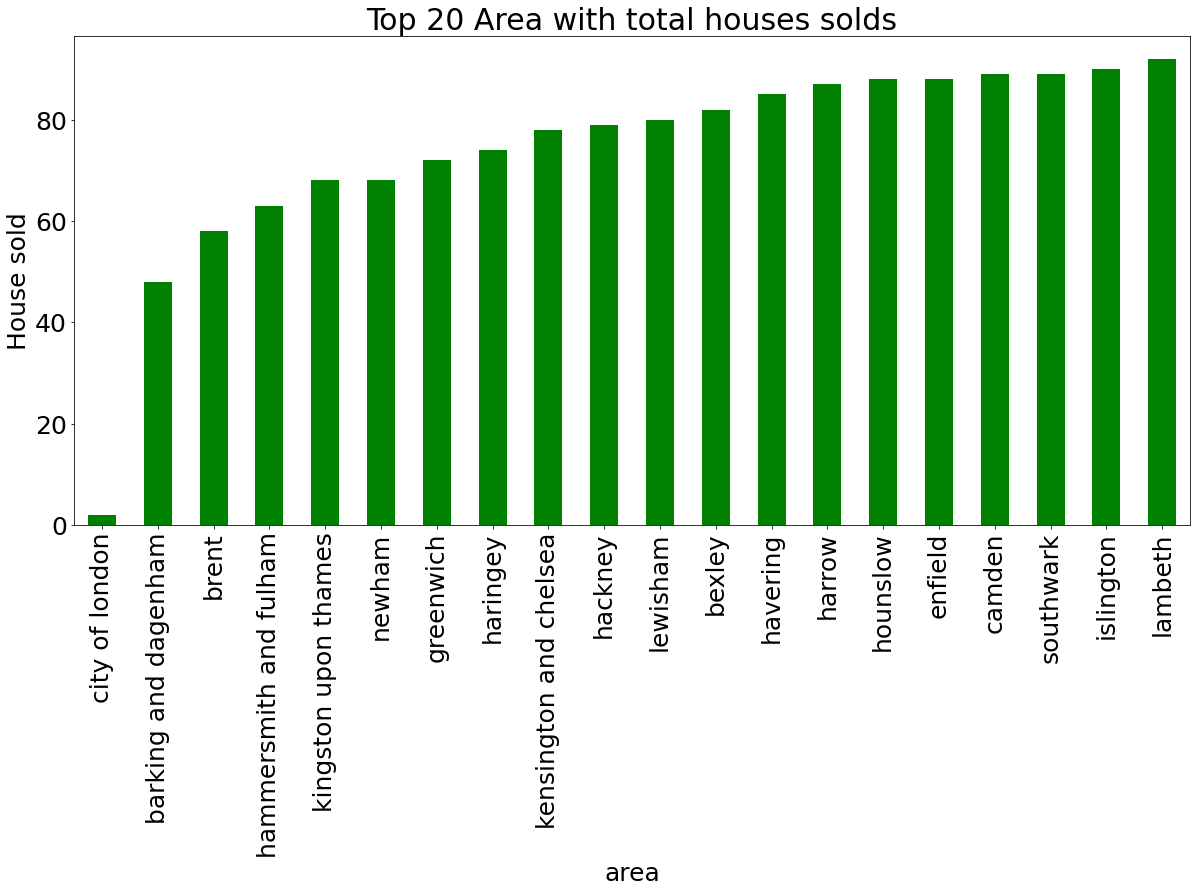

In [13]:
# we extract top 20 country with total house sold using groupby.
PLT.rcParams.update({'font.size': 25}) 
Top_20_Countries1 = london_data.groupby('area')['houses_sold'].min().sort_values(ascending = True).head(20)  
# making bar graph with data and passing all parameter.  
Top_20_Countries1.plot(kind = "bar",figsize = (20, 9),title="Top 20 Area with total houses solds",color='g')
# we set ylabel for graph. 
PLT.ylabel('House sold')
Top_20_Countries1  